# Setup

**Imports**

In [ ]:
!pip install loadmydata
!pip install dtw-python

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from dtw import dtw
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for loadmydata: filename=loadmydata-0.0.9-py3-none-any.whl size=17910 sha256=a25918f66396342f5979491471736ccba2f3fb73f8e15298a49655ef756fc488
  Stored in directory: /root/.cache/pip/wheels/b9/8d/92/adbc1c5d09f8492ea5c2dfd6b66f57d267d4ccb618ae3481ed
Successfully built loadmydata
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.4/661.4 KB 24.9 MB/s eta 0:00:00
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



**Utility functions**

In [ ]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

For N = 200


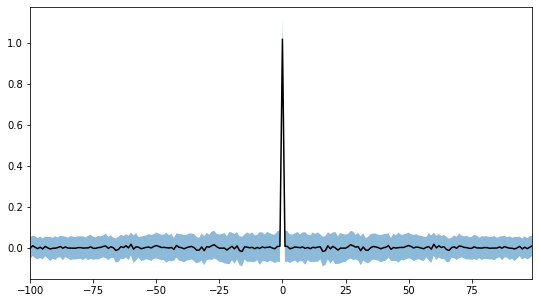

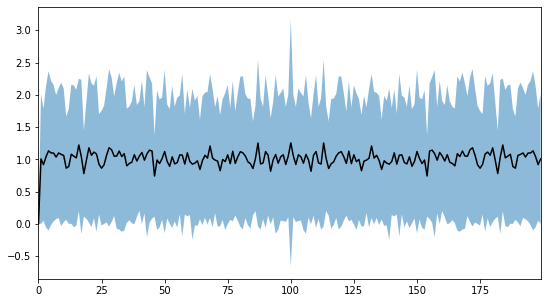

For N = 500


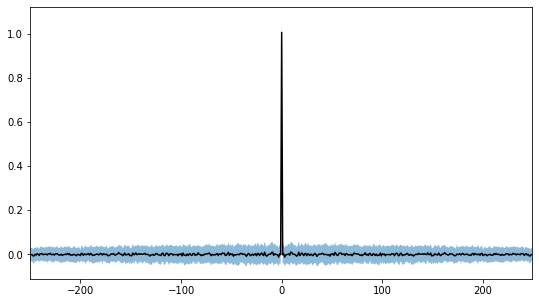

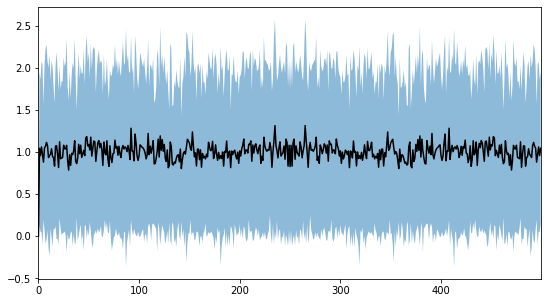

For N = 1000


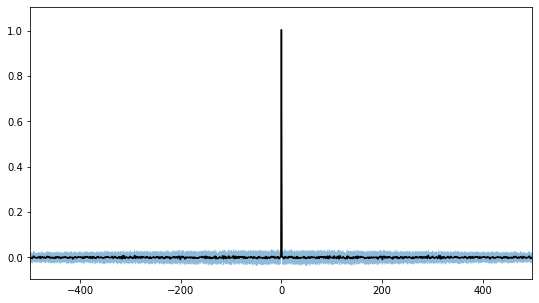

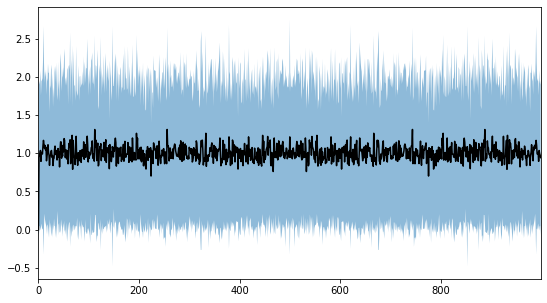

In [ ]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
N_array = np.array([200,500,1000])
iter_per_N = 100

for N in N_array:
  print("For N = %i"%N)
  samples = np.random.randn(iter_per_N,N)  # shape (n_trials, n_freqs)

  taus = np.arange(-N/2, N/2, 1)
  autovar = np.array([1/N*np.correlate(samples[iter],samples[iter],mode="same") for iter in range(iter_per_N)])

  fig, ax = fig_ax(figsize=(9, 5))

  avg = autovar.mean(axis=0)
  std = autovar.std(axis=0)
  ax.plot(taus, avg, 'k-')
  ax.fill_between(taus, avg-std, avg+std, alpha=0.5)


  periodo = np.array([sp.periodogram(samples[iter], return_onesided=False)[1] for iter in range(iter_per_N)])

  fig, ax = fig_ax(figsize=(9, 5))

  avg = periodo.mean(axis=0)
  std = periodo.std(axis=0)
  ax.plot(np.arange(avg.shape[0]), avg, 'k-')
  ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5)

  plt.show()

## Question 9

For N = 200


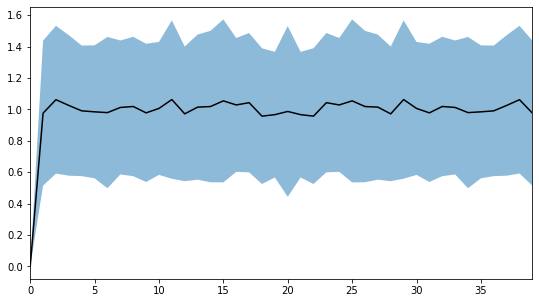

For N = 500


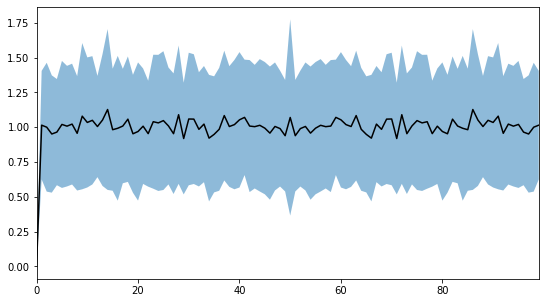

For N = 1000


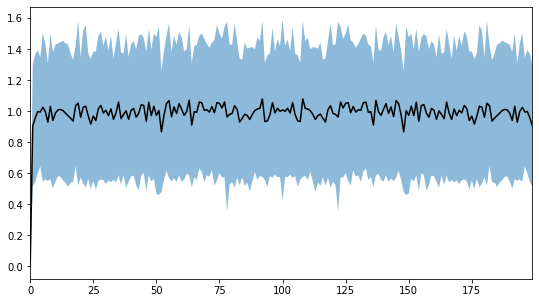

In [ ]:
N_array = np.array([200,500,1000])
iter_per_N = 100
K = 5

for N in N_array:
  print("For N = %i"%N)
  samples = np.random.randn(iter_per_N,N)  # shape (n_trials, n_freqs)
  samples_divided = np.split(samples,K,axis=1)

  periodo = np.array([np.mean([sp.periodogram(samples_divided[i][iter], return_onesided=False)[1] for i in range(K)], axis = 0) for iter in range(iter_per_N)])

  fig, ax = fig_ax(figsize=(9, 5))

  avg = periodo.mean(axis=0)
  std = periodo.std(axis=0)
  ax.plot(np.arange(avg.shape[0]), avg, 'k-')
  ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5)

  plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)


X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [00:33<00:00, 6.06MiB/s]


## Question 10

In [ ]:
import sklearn.neighbors
import sklearn.model_selection
import sklearn.metrics

In [ ]:
distance_matrix_train = np.array([[dtw(word1,word2).distance for word2 in X_train] for word1 in X_train])

In [ ]:
n_neighbors = np.arange(1,10)

classifyers = [sklearn.neighbors.KNeighborsClassifier(n_neighbor, metric= "precomputed") for n_neighbor in n_neighbors]

for i in range(len(n_neighbors)):
  score = sklearn.model_selection.cross_validate(estimator = classifyers[i], X = distance_matrix_train, y = y_train, scoring = 'f1', cv = 5, return_train_score = True)

  print("The score for k=%i was for training :"%n_neighbors[i])
  print(score['train_score'])

  print("The score for k=%i was for testing :"%n_neighbors[i])
  print(score['test_score'])

  print('\n')

The score for k=1 was for training :
[1. 1. 1. 1. 1.]
The score for k=1 was for testing :
[0.65       0.77419355 0.875      0.69230769 0.85714286]


The score for k=2 was for training :
[0.93333333 0.93333333 0.91525424 0.93333333 0.92436975]
The score for k=2 was for testing :
[0.65       0.68965517 0.89655172 0.54545455 0.60869565]


The score for k=3 was for training :
[0.92307692 0.912      0.90322581 0.90625    0.89230769]
The score for k=3 was for testing :
[0.65       0.70967742 0.9375     0.66666667 0.81481481]


The score for k=4 was for training :
[0.8852459  0.89430894 0.8852459  0.89430894 0.8852459 ]
The score for k=4 was for testing :
[0.65       0.68965517 0.78571429 0.66666667 0.72      ]


The score for k=5 was for training :
[0.88888889 0.88       0.87301587 0.87692308 0.84615385]
The score for k=5 was for testing :
[0.65       0.78787879 0.78571429 0.76923077 0.85714286]


The score for k=6 was for training :
[0.8852459  0.87603306 0.8852459  0.86178862 0.848     ]
T

In [ ]:
best_classifyer = classifyers[4] #k = 5
best_classifyer.fit(distance_matrix_train, y_train)

KNeighborsClassifier(metric='precomputed')

In [ ]:
distance_matrix_test = np.array([[dtw(word1,word2).distance for word2 in X_train] for word1 in X_test])

In [ ]:
y_pred_train = best_classifyer.predict(distance_matrix_train)
train_score = sklearn.metrics.f1_score(y_train,y_pred_train)

y_pred = best_classifyer.predict(distance_matrix_test)
test_score = sklearn.metrics.f1_score(y_test,y_pred)

print("The score of the best classifyer is %f for the training set and %f for the test set"%(train_score,test_score))

The score of the best classifyer is 0.867925 for the training set and 0.454545 for the test set


## Question 11

In [ ]:
y_test = np.array(y_test)

good_or_bad = np.abs(y_test - y_pred)

misclassified = good_or_bad == 1 #Bad classification
healthy_bad = np.where(np.logical_and(y_test == 0, misclassified == True))[0] #Misclassified healthy samples
disease_bad = np.where(np.logical_and(y_test == 1, misclassified == True))[0] #Misclassified diseased samples

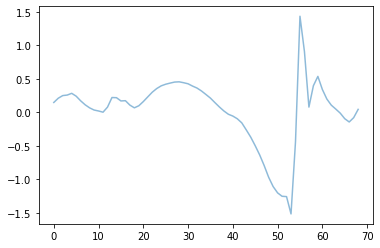

In [ ]:
healthy_sample = X_test[healthy_bad[0]]
tt = np.arange(healthy_sample.shape[0])
plt.plot(tt, healthy_sample, alpha=0.5)

plt.show()

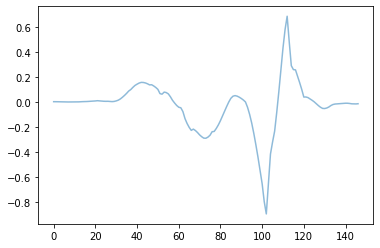

In [ ]:
disease_sample = X_test[disease_bad[0]]
tt = np.arange(disease_sample.shape[0])
plt.plot(tt, disease_sample, alpha=0.5)

plt.show()